In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [35]:
# Reading the CSV File
bank_df = pd.read_csv('bank_additional_full.csv',sep=';')

In [36]:
# Visualizing the dataset
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
#Standardizing the Column Names
bank_df.columns = bank_df.columns.str.strip().str.replace('.','_')

In [38]:
# Getting dataset info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Segregating the object columns from the dataset

In [71]:
# Segregating object columns from the dataset and converting them to categorical
cat_df = bank_df.select_dtypes(include='object')

In [72]:
cat_df = cat_df.astype('category')

In [73]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  category
 1   marital      41188 non-null  category
 2   education    41188 non-null  category
 3   default      41188 non-null  category
 4   housing      41188 non-null  category
 5   loan         41188 non-null  category
 6   contact      41188 non-null  category
 7   month        41188 non-null  category
 8   day_of_week  41188 non-null  category
 9   poutcome     41188 non-null  category
 10  y            41188 non-null  category
dtypes: category(11)
memory usage: 444.7 KB


In [43]:
# Grouping the num_df datframe column by the response variable y
df_group = cat_df.groupby('y',as_index=False)

In [44]:
# getting the group corresponding to non_subscibers
df_y0 = df_group.get_group('no')

In [45]:
# getting the group corresponding to subscibers
df_y1 = df_group.get_group('yes')

## Doing the EDA of the categorical columns

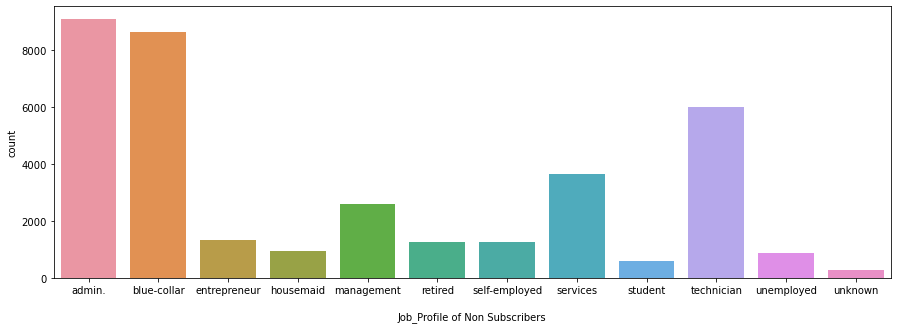

In [46]:
# Examining the distribution of Jobs column for the non_subscribers
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df_y0)
plt.xlabel('\nJob_Profile of Non Subscribers')
plt.show()

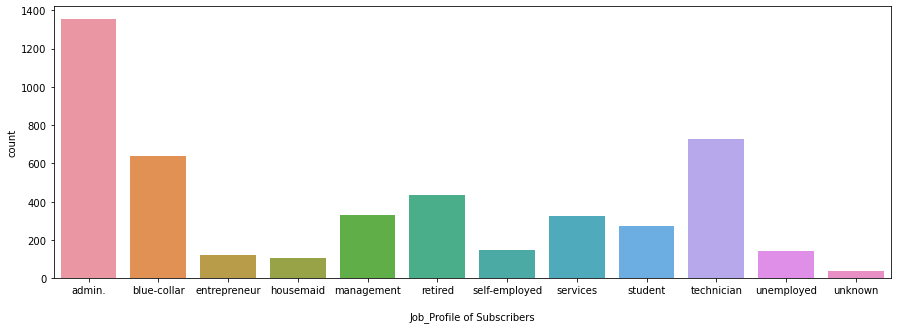

In [47]:
# Examining the distribution of Jobs column for the subscribers
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df_y1)
plt.xlabel('\nJob_Profile of Subscribers')
plt.show()

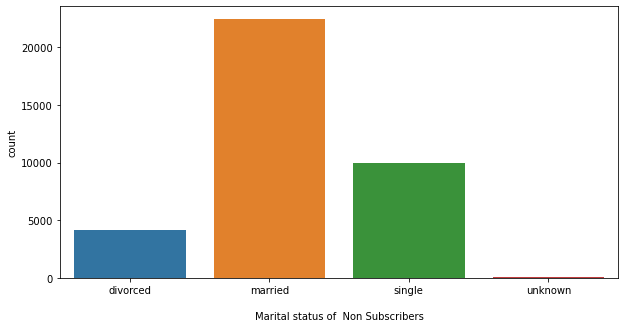

In [48]:
# Examining the marital status for the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='marital',data=df_y0)
plt.xlabel('\nMarital status of  Non Subscribers')
plt.show()

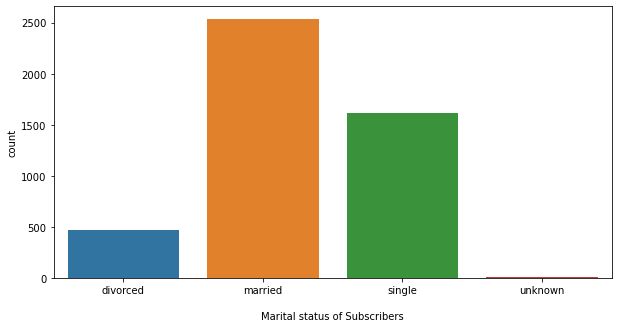

In [49]:
# Examining the marital status for the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='marital',data=df_y1)
plt.xlabel('\nMarital status of Subscribers')
plt.show()

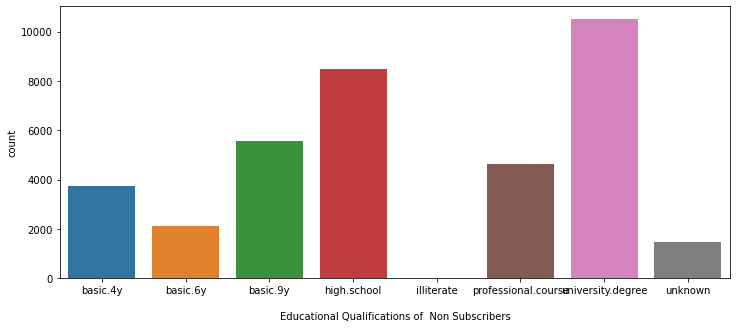

In [50]:
# Examining the educational Qualifications for the non_subscribers
plt.figure(figsize=(12,5))
sns.countplot(x='education',data=df_y0)
plt.xlabel('\nEducational Qualifications of  Non Subscribers')
plt.show()

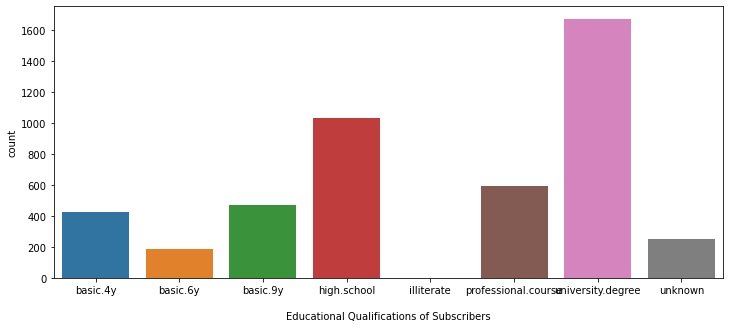

In [51]:
# Examining the educational Qualifications for the subscribers
plt.figure(figsize=(12,5))
sns.countplot(x='education',data=df_y1)
plt.xlabel('\nEducational Qualifications of Subscribers')
plt.show()

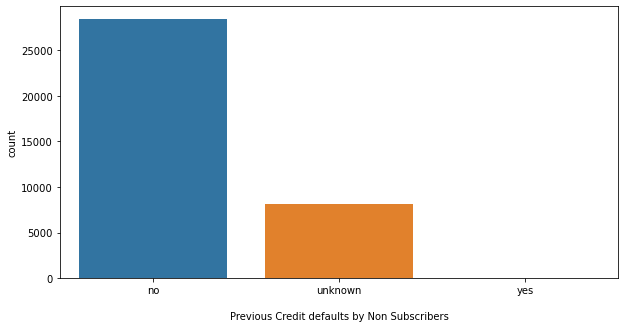

In [52]:
# Examining the Credit history for the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=df_y0)
plt.xlabel('\nPrevious Credit defaults by Non Subscribers')
plt.show()

In [53]:
df_y0['default'].value_counts()

no         28391
unknown     8154
yes            3
Name: default, dtype: int64

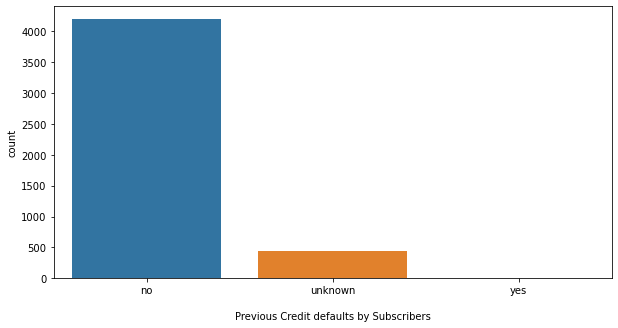

In [54]:
# Examining the Credit history for the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=df_y1)
plt.xlabel('\nPrevious Credit defaults by Subscribers')
plt.show()

In [55]:
df_y1['default'].value_counts()

no         4197
unknown     443
yes           0
Name: default, dtype: int64

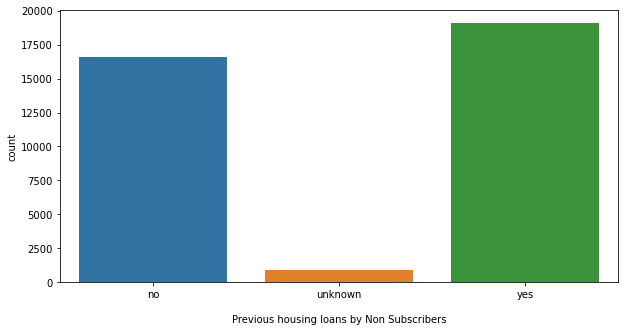

In [56]:
# Examining the Previous housing loans for the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='housing',data=df_y0)
plt.xlabel('\nPrevious housing loans by Non Subscribers')
plt.show()

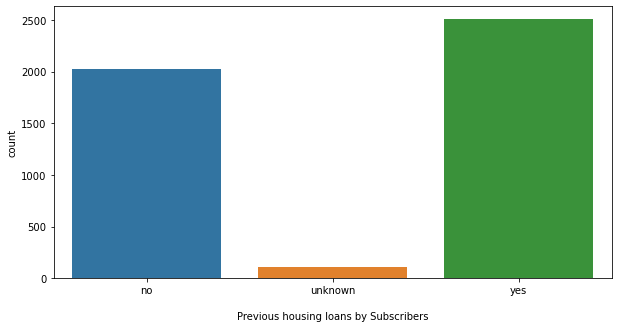

In [57]:
# Examining the Previous housing loans for the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='housing',data=df_y1)
plt.xlabel('\nPrevious housing loans by Subscribers')
plt.show()

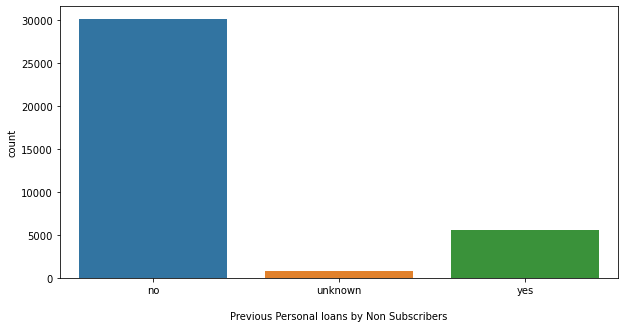

In [58]:
# Examining the Previous Personal loans for the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='loan',data=df_y0)
plt.xlabel('\nPrevious Personal loans by Non Subscribers')
plt.show()

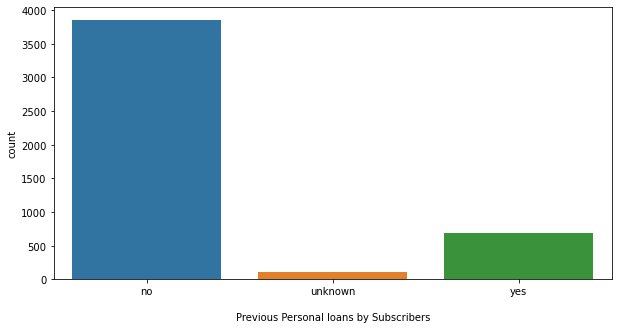

In [59]:
# Examining the Previous Personal loans for the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='loan',data=df_y1)
plt.xlabel('\nPrevious Personal loans by Subscribers')
plt.show()

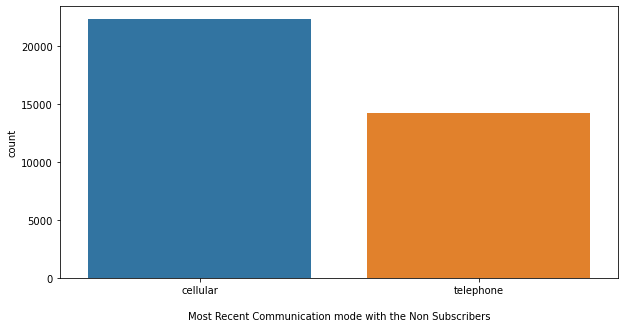

In [60]:
# Examining the most recent communication mode with the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='contact',data=df_y0)
plt.xlabel('\nMost Recent Communication mode with the Non Subscribers')
plt.show()

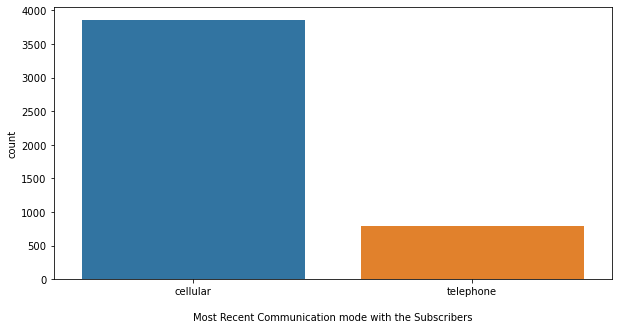

In [61]:
# Examining the most recent communication mode with the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='contact',data=df_y1)
plt.xlabel('\nMost Recent Communication mode with the Subscribers')
plt.show()

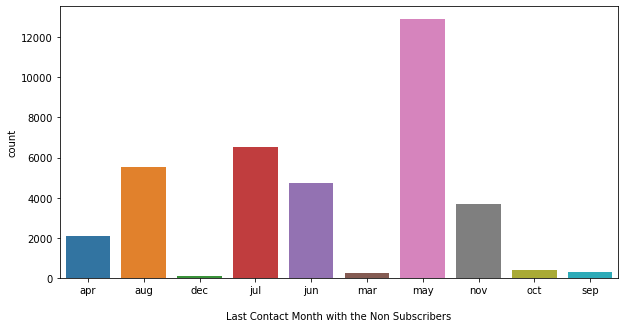

In [62]:
# Examining the Last contact month with the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df_y0)
plt.xlabel('\nLast Contact Month with the Non Subscribers')
plt.show()

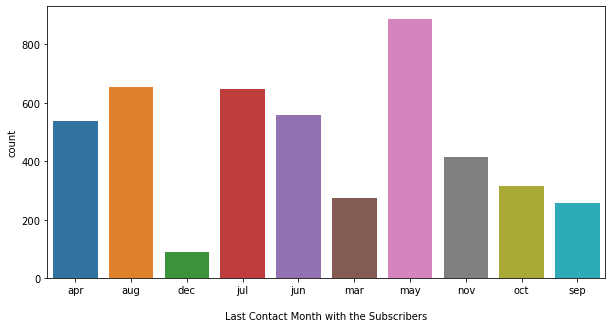

In [63]:
# Examining the Last contact month with the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df_y1)
plt.xlabel('\nLast Contact Month with the Subscribers')
plt.show()

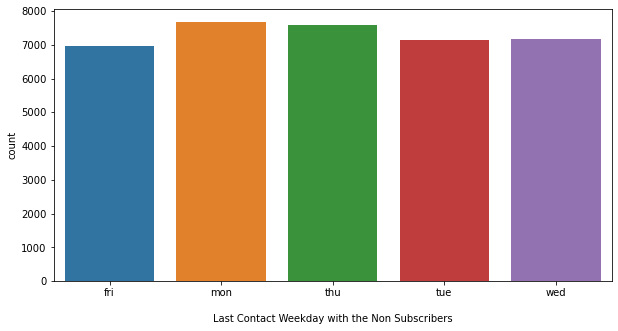

In [64]:
# Examining the Last contact weekday with the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week',data=df_y0)
plt.xlabel('\nLast Contact Weekday with the Non Subscribers')
plt.show()

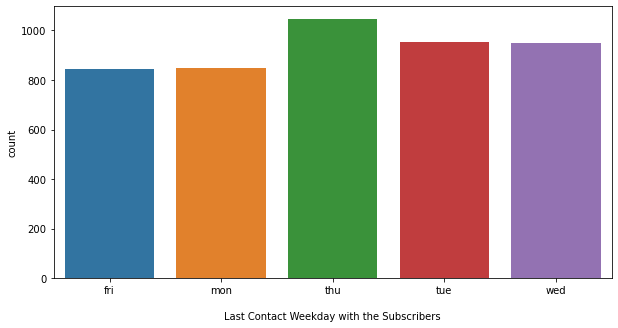

In [65]:
# Examining the Last contact weekday with the Subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week',data=df_y1)
plt.xlabel('\nLast Contact Weekday with the Subscribers')
plt.show()

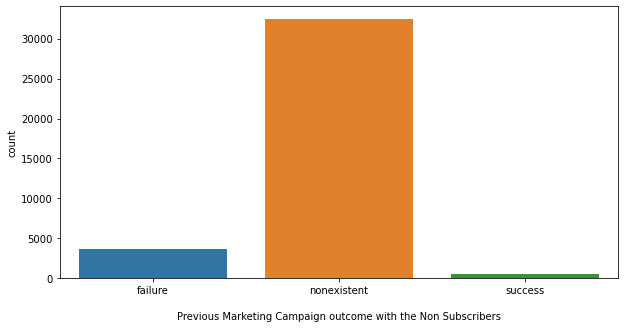

In [66]:
# Examining the Previous Marketing Campaign outcome with the non_subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='poutcome',data=df_y0)
plt.xlabel('\nPrevious Marketing Campaign outcome with the Non Subscribers')
plt.show()

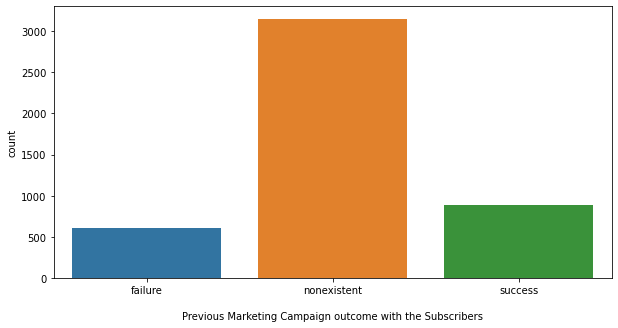

In [67]:
# Examining the Previous Marketing Campaign outcome with the subscribers
plt.figure(figsize=(10,5))
sns.countplot(x='poutcome',data=df_y1)
plt.xlabel('\nPrevious Marketing Campaign outcome with the Subscribers')
plt.show()

## Creating the Dummy variables 

In [74]:
# Dropping Response variable and the dropping dummies
cat_final = cat_df.drop(columns='y')

In [76]:
cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  category
 1   marital      41188 non-null  category
 2   education    41188 non-null  category
 3   default      41188 non-null  category
 4   housing      41188 non-null  category
 5   loan         41188 non-null  category
 6   contact      41188 non-null  category
 7   month        41188 non-null  category
 8   day_of_week  41188 non-null  category
 9   poutcome     41188 non-null  category
dtypes: category(10)
memory usage: 404.4 KB


In [77]:
cat_final = pd.get_dummies(cat_final,prefix='cat')

In [78]:
cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cat_admin.               41188 non-null  uint8
 1   cat_blue-collar          41188 non-null  uint8
 2   cat_entrepreneur         41188 non-null  uint8
 3   cat_housemaid            41188 non-null  uint8
 4   cat_management           41188 non-null  uint8
 5   cat_retired              41188 non-null  uint8
 6   cat_self-employed        41188 non-null  uint8
 7   cat_services             41188 non-null  uint8
 8   cat_student              41188 non-null  uint8
 9   cat_technician           41188 non-null  uint8
 10  cat_unemployed           41188 non-null  uint8
 11  cat_unknown              41188 non-null  uint8
 12  cat_divorced             41188 non-null  uint8
 13  cat_married              41188 non-null  uint8
 14  cat_single               41188 non-null  uint8
 15  ca